In [9]:
import torch
from torch_geometric.data import Data
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
# import concurrent.futures

In [10]:
fileset = {}

sig_dir = '/mdsmlvol/rechits_v4/raw/'
fileset['sample'] = [sig_dir + f'BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300_{str(i).zfill(7)}.root' for i in range(328)]
# fileset['sample'] = [sig_dir + f'BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300_{str(i).zfill(7)}.root' for i in range(2)]

# bkg_dir = '/ceph/cms/store/user/aaportel/B-Parking/rechits_v2/ParkingBPH1_2018A/'
# fileset['background'] = [bkg_dir + f'ParkingBPH1_2018A_{str(i).zfill(7)}.root' for i in range(380)]

In [23]:
size_arrays = []
label_arrays = []

for file in fileset['sample']:
    f = uproot.open(file)
    clusterSize = f['MuonSystem:cscRechitClusterSize'].arrays(library = 'ak')['cscRechitClusterSize']
    clusterEta = f['MuonSystem:cscRechitClusterEta'].arrays(library = 'ak')['cscRechitClusterEta']
    clusterPhi = f['MuonSystem:cscRechitClusterPhi'].arrays(library = 'ak')['cscRechitClusterPhi']

    gLLP_eta = f['MuonSystem:gLLP_eta'].arrays(library = 'ak')['gLLP_eta']
    gLLP_phi = f['MuonSystem:gLLP_phi'].arrays(library = 'ak')['gLLP_phi']

    # ids = raw_data.cscRechitClusterSegmentID[raw_data.cscRechitClusterSegmentID!=-999]

    # def clusterer(data, ids):
    #     clustered = []
    #     for i in range(len(ids)):
    #         clusters = []
    #         for id in ids[i]:
    #             clusters.append(data[i][id])
    #         clustered.append(clusters)    
    #     return ak.flatten(ak.Array(clustered), axis = 1)
    
    # cscRechits_clustered = ak.zip({
    #     "Phi": clusterer(raw_data.cscRechitsPhi, ids),
    #     "Eta": clusterer(raw_data.cscRechitsEta, ids),
    #     "X": clusterer(raw_data.cscRechitsX, ids),
    #     "Y": clusterer(raw_data.cscRechitsY, ids),
    #     "Z": clusterer(raw_data.cscRechitsZ, ids),
    #     "E": clusterer(raw_data.cscRechitsE, ids),
    #     "Tpeak": clusterer(raw_data.cscRechitsTpeak, ids),
    #     "Twire": clusterer(raw_data.cscRechitsTwire, ids),
    #     "Quality": clusterer(raw_data.cscRechitsQuality, ids),
    #     "Chamber": clusterer(raw_data.cscRechitsChamber, ids),
    #     "Station": clusterer(raw_data.cscRechitsStation, ids),
    #     "Channels": clusterer(raw_data.cscRechitsChannels, ids),
    #     "NStrips": clusterer(raw_data.cscRechitsNStrips, ids),
    #     "HitWire": clusterer(raw_data.cscRechitsHitWire, ids),
    #     "WGroupsBX": clusterer(raw_data.cscRechitsWGroupsBX, ids),
    #     "NWireGroups": clusterer(raw_data.cscRechitsNWireGroups, ids),
    #     "DetId": clusterer(raw_data.cscRechitsDetId, ids),
    # })
    
    # cscRechitClusters = ak.zip({
    #     "X": ak.flatten(raw_data.cscRechitClusterX, axis = 1),
    #     "Y": ak.flatten(raw_data.cscRechitClusterY, axis = 1),
    #     "Z": ak.flatten(raw_data.cscRechitClusterZ, axis = 1),
    #     "Time": ak.flatten(raw_data.cscRechitClusterTime, axis = 1),
    #     "TimeWeighted": ak.flatten(raw_data.cscRechitClusterTimeWeighted, axis = 1),
    #     "TimeTotal": ak.flatten(raw_data.cscRechitClusterTimeTotal, axis = 1),
    #     "TimeSpread": ak.flatten(raw_data.cscRechitClusterTimeSpread, axis = 1),
    #     "TimeSpreadWeighted": ak.flatten(raw_data.cscRechitClusterTimeSpreadWeighted, axis = 1),
    #     "TimeSpreadWeightedAll": ak.flatten(raw_data.cscRechitClusterTimeSpreadWeightedAll, axis = 1),
    #     "GenMuonDeltaR": ak.flatten(raw_data.cscRechitClusterGenMuonDeltaR, axis = 1),
    #     "Phi": ak.flatten(raw_data.cscRechitClusterPhi, axis = 1),
    #     "Eta": ak.flatten(raw_data.cscRechitClusterEta, axis = 1),
    #     "Size": ak.flatten(raw_data.cscRechitClusterSize, axis = 1),
    #     "Me11Ratio": ak.flatten(raw_data.cscRechitClusterMe11Ratio, axis = 1),
    #     "Me12Ratio": ak.flatten(raw_data.cscRechitClusterMe12Ratio, axis = 1),
    #     "NStation": ak.flatten(raw_data.cscRechitClusterNStation, axis = 1),
    #     "NStation5": ak.flatten(raw_data.cscRechitClusterNStation5, axis = 1),
    #     "NStation10": ak.flatten(raw_data.cscRechitClusterNStation10, axis = 1),
    #     "NStation10perc": ak.flatten(raw_data.cscRechitClusterNStation10perc, axis = 1),
    #     "AvgStation": ak.flatten(raw_data.cscRechitClusterAvgStation, axis = 1),
    #     "AvgStation5": ak.flatten(raw_data.cscRechitClusterAvgStation5, axis = 1),
    #     "AvgStation10": ak.flatten(raw_data.cscRechitClusterAvgStation10, axis = 1),
    #     "AvgStation10perc": ak.flatten(raw_data.cscRechitClusterAvgStation10perc, axis = 1),
    #     "MatchedTrackSumPt_0p2": ak.flatten(raw_data.cscRechitClusterMatchedTrackSumPt_0p2, axis = 1),
    #     "MatchedTrackLeadPt_0p2": ak.flatten(raw_data.cscRechitClusterMatchedTrackLeadPt_0p2, axis = 1),
    #     "MatchedTrackSize_0p2": ak.flatten(raw_data.cscRechitClusterMatchedTrackSize_0p2, axis = 1),
    #     "MatchedTrackSumPt_0p3": ak.flatten(raw_data.cscRechitClusterMatchedTrackSumPt_0p3, axis = 1),
    #     "MatchedTrackLeadPt_0p3": ak.flatten(raw_data.cscRechitClusterMatchedTrackLeadPt_0p3, axis = 1),
    #     "MatchedTrackSize_0p3": ak.flatten(raw_data.cscRechitClusterMatchedTrackSize_0p3, axis = 1),
    #     "MatchedTrackSumPt_0p4": ak.flatten(raw_data.cscRechitClusterMatchedTrackSumPt_0p4, axis = 1),
    #     "MatchedTrackLeadPt_0p4": ak.flatten(raw_data.cscRechitClusterMatchedTrackLeadPt_0p4, axis = 1),
    #     "MatchedTrackSize_0p4": ak.flatten(raw_data.cscRechitClusterMatchedTrackSize_0p4, axis = 1),
    #     "MatchedTrackSumPt_trk_pos_0p5": ak.flatten(raw_data.cscRechitClusterMatchedTrackSumPt_trk_pos_0p5, axis = 1),
    #     "MatchedTrackLeadPt_trk_pos_0p5": ak.flatten(raw_data.cscRechitClusterMatchedTrackLeadPt_trk_pos_0p5, axis = 1),
    #     "MatchedTrackSize_trk_pos_0p5": ak.flatten(raw_data.cscRechitClusterMatchedTrackSize_trk_pos_0p5, axis = 1),
    #     "MatchedTrackSumPt_trk_pos_0p2": ak.flatten(raw_data.cscRechitClusterMatchedTrackSumPt_trk_pos_0p2, axis = 1),
    #     "MatchedTrackLeadPt_trk_pos_0p2": ak.flatten(raw_data.cscRechitClusterMatchedTrackLeadPt_trk_pos_0p2, axis = 1),
    #     "MatchedTrackSize_trk_pos_0p2": ak.flatten(raw_data.cscRechitClusterMatchedTrackSize_trk_pos_0p2, axis = 1),
    #     "MatchedTrackSumPt_trk_pos_0p3": ak.flatten(raw_data.cscRechitClusterMatchedTrackSumPt_trk_pos_0p3, axis = 1),
    #     "MatchedTrackLeadPt_trk_pos_0p3": ak.flatten(raw_data.cscRechitClusterMatchedTrackLeadPt_trk_pos_0p3, axis = 1),
    #     "MatchedTrackSize_trk_pos_0p3": ak.flatten(raw_data.cscRechitClusterMatchedTrackSize_trk_pos_0p3, axis = 1),
    #     "MatchedTrackSumPt_trk_pos_0p4": ak.flatten(raw_data.cscRechitClusterMatchedTrackSumPt_trk_pos_0p4, axis = 1),
    #     "MatchedTrackLeadPt_trk_pos_0p4": ak.flatten(raw_data.cscRechitClusterMatchedTrackLeadPt_trk_pos_0p4, axis = 1),
    #     "MatchedTrackSize_trk_pos_0p4": ak.flatten(raw_data.cscRechitClusterMatchedTrackSize_trk_pos_0p4, axis = 1),
    #     "MaxStation": ak.flatten(raw_data.cscRechitClusterMaxStation, axis = 1),
    #     "MaxStationRatio": ak.flatten(raw_data.cscRechitClusterMaxStationRatio, axis = 1),
    #     "NChamber": ak.flatten(raw_data.cscRechitClusterNChamber, axis = 1),
    #     "MaxChamber": ak.flatten(raw_data.cscRechitClusterMaxChamber, axis = 1),
    #     "MaxChamberRatio": ak.flatten(raw_data.cscRechitClusterMaxChamberRatio, axis = 1),
    #     "NRechitChamberPlus11": ak.flatten(raw_data.cscRechitClusterNRechitChamberPlus11, axis = 1),
    #     "NRechitChamberPlus12": ak.flatten(raw_data.cscRechitClusterNRechitChamberPlus12, axis = 1),
    #     "NRechitChamberPlus13": ak.flatten(raw_data.cscRechitClusterNRechitChamberPlus13, axis = 1),
    #     "NRechitChamberPlus21": ak.flatten(raw_data.cscRechitClusterNRechitChamberPlus21, axis = 1),
    #     "NRechitChamberPlus22": ak.flatten(raw_data.cscRechitClusterNRechitChamberPlus22, axis = 1),
    #     "NRechitChamberPlus31": ak.flatten(raw_data.cscRechitClusterNRechitChamberPlus31, axis = 1),
    #     "NRechitChamberPlus32": ak.flatten(raw_data.cscRechitClusterNRechitChamberPlus32, axis = 1),
    #     "NRechitChamberPlus41": ak.flatten(raw_data.cscRechitClusterNRechitChamberPlus41, axis = 1),
    #     "NRechitChamberPlus42": ak.flatten(raw_data.cscRechitClusterNRechitChamberPlus42, axis = 1),
    #     "NRechitChamberMinus11": ak.flatten(raw_data.cscRechitClusterNRechitChamberMinus11, axis = 1),
    #     "NRechitChamberMinus12": ak.flatten(raw_data.cscRechitClusterNRechitChamberMinus12, axis = 1),
    #     "NRechitChamberMinus13": ak.flatten(raw_data.cscRechitClusterNRechitChamberMinus13, axis = 1),
    #     "NRechitChamberMinus21": ak.flatten(raw_data.cscRechitClusterNRechitChamberMinus21, axis = 1),
    #     "NRechitChamberMinus22": ak.flatten(raw_data.cscRechitClusterNRechitChamberMinus22, axis = 1),
    #     "NRechitChamberMinus31": ak.flatten(raw_data.cscRechitClusterNRechitChamberMinus31, axis = 1),
    #     "NRechitChamberMinus32": ak.flatten(raw_data.cscRechitClusterNRechitChamberMinus32, axis = 1),
    #     "NRechitChamberMinus41": ak.flatten(raw_data.cscRechitClusterNRechitChamberMinus41, axis = 1),
    #     "NRechitChamberMinus42": ak.flatten(raw_data.cscRechitClusterNRechitChamberMinus42, axis = 1),
    #     "_match_dtSeg_0p4": ak.flatten(raw_data.cscRechitCluster_match_dtSeg_0p4, axis = 1),
    #     "_match_MB1Seg_0p4": ak.flatten(raw_data.cscRechitCluster_match_MB1Seg_0p4, axis = 1),
    #     "_match_RB1_0p4": ak.flatten(raw_data.cscRechitCluster_match_RB1_0p4, axis = 1),
    #     "_match_RE12_0p4": ak.flatten(raw_data.cscRechitCluster_match_RE12_0p4, axis = 1),
    #     "_match_gLLP_deltaR": ak.flatten(raw_data.cscRechitCluster_match_gLLP_deltaR, axis = 1),
    #     "JetVetoPt": ak.flatten(raw_data.cscRechitClusterJetVetoPt, axis = 1),
    #     "MuonVetoPt": ak.flatten(raw_data.cscRechitClusterMuonVetoPt, axis = 1),
    #     "GenMuonVetoPt_dR0p8": ak.flatten(raw_data.cscRechitClusterGenMuonVetoPt_dR0p8, axis = 1),
    #     "GenMuonVetoPt": ak.flatten(raw_data.cscRechitClusterGenMuonVetoPt, axis = 1),
    #     "MetEENoise_dPhi": ak.flatten(raw_data.cscRechitClusterMetEENoise_dPhi, axis = 1),
        
    # })

    def deltaR(eta1, phi1, eta2, phi2):
        deta = eta1 - eta2
        dphi = np.arctan2(np.sin(phi1 - phi2), np.cos(phi1 - phi2))
        return np.sqrt(deta**2 + dphi**2)
    
    labels = ak.flatten(
            deltaR(clusterEta, clusterPhi, gLLP_eta, gLLP_phi) < .8, 
        axis = 1)

    size_array_current = ak.flatten(clusterSize, axis=1)
    size_arrays.append(size_array_current)
    label_arrays.append(labels)

# After the loop, concatenate all Size arrays into one
aggregated_size_array = ak.concatenate(size_arrays, axis=0)
aggregated_label_array = ak.concatenate(label_arrays, axis=0)

In [26]:
aggregated_size_array
# aggregated_label_array

<Array [113, 52, 52, 75, 56, ..., 64, 118, 103, 54, 70] type='126075 * int32'>

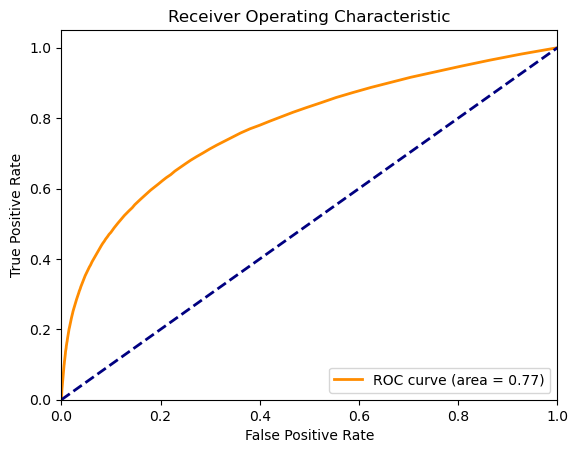

In [25]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 2: Generate ROC curve data
fpr, tpr, thresholds = roc_curve(aggregated_label_array, aggregated_size_array)
roc_auc = auc(fpr, tpr)

# Step 3: Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
